In [1]:
"""
Script to plot the runtime of different approximation techniques
"""
import numpy as np
import pandas as pd
import altair as alt

In [2]:
from timing import run_experiment, load_times
# times_df = run_experiment(deltas=[0., 0.01, 0.05, 0.1, 0.2, 0.5, 1.], runs=1)
times_df = load_times()


In [7]:
times_df.head()

,complex,filename,run,points,dim,size,size_reduced,delta,algorithm,result,time_s
0,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_100pts_0.csv,97f813430478448bbc27c6ffc4535002,100,2,575,385,0.00,binning,190,0.689705
1,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_100pts_0.csv,3b970beb617d4e4b9fb73a07d79850f4,100,2,575,385,0.01,binning,304,0.814057
2,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_100pts_0.csv,7008b5d81d254515acb9ee47c442e427,100,2,575,385,0.05,binning,404,0.885510
3,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_100pts_0.csv,f42fdc28794642cf972ce14c225d8142,100,2,575,385,0.10,binning,526,1.057149
4,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_100pts_0.csv,27895851be8f4731b540e41c2c0fb3d7,100,2,575,385,0.20,binning,566,1.218052


In [16]:
times_df = times_df[times_df["dim"] == 2]
times_df = times_df[times_df["points"] == 200]
times_df = times_df[times_df["delta"] <= .2]

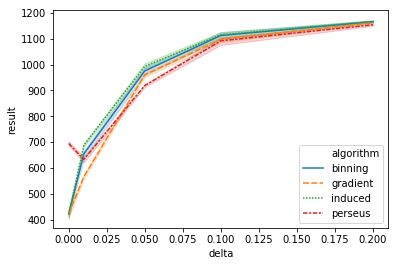

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x="delta", y="result",
             hue="algorithm", style="algorithm",
             data=times_df)
plt.savefig("reductions.png", bbox_inches="tight")
plt.show()



In [26]:
times_df[(times_df["delta"] == 0) #& (times_df["result"] > 600)
        ].head(10)

,complex,filename,run,points,dim,size,size_reduced,delta,algorithm,result,time_s
140,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_0.csv,a82dc074019443508b2197549166a5f8,200,2,1179,751,0.0,binning,428,1.531960
147,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_0.csv,fbbba080c6d446b793693fc29186fe48,200,2,1179,751,0.0,gradient,428,0.500769
154,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_0.csv,b8566ff4af824401b3b2369830148005,200,2,1179,751,0.0,induced,428,1.535548
161,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_0.csv,c2d6ce1b7c9041328bb6939cca736fc4,200,2,1179,751,0.0,perseus,682,0.021227
170,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_1.csv,35b2fa1d026b4c52890a240a52d98ba9,200,2,1171,717,0.0,binning,454,1.482935
177,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_1.csv,1a81e49157fb4de09a7ace9b9a0627d1,200,2,1171,717,0.0,gradient,454,0.439623
184,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_1.csv,ba9e53ca218e48ffb3fa3b36d6e868dd,200,2,1171,717,0.0,induced,454,1.489181
191,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_1.csv,446039ba12cb4ab5878b3e829df11257,200,2,1171,717,0.0,perseus,692,0.021915
198,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_2.csv,9e920d93a63d499c96abaf0039eeb22f,200,2,1173,775,0.0,binning,398,1.575435
205,<class 'dmt.cechmate_wrap.AlphaComplex'>,normal_dist_2D_200pts_2.csv,d60e27763dcc4990860ea033ef061a1d,200,2,1173,775,0.0,gradient,398,0.467670


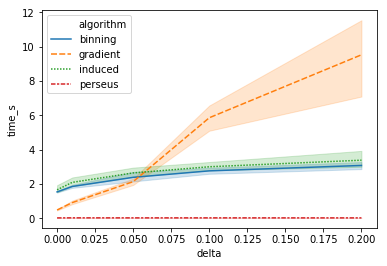

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.lineplot(x="delta", y="time_s",
             hue="algorithm", style="algorithm",
             data=times_df)
plt.savefig("timings.png", bbox_inches="tight")
plt.show()

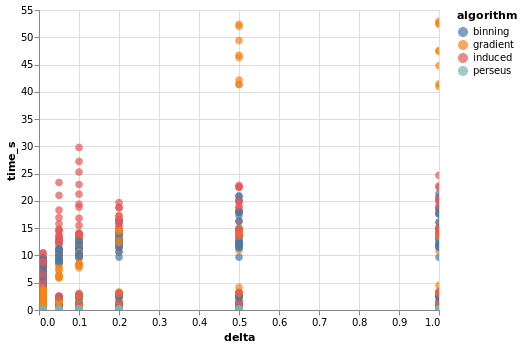

In [4]:
alt.Chart(times_df).mark_circle(size=60).encode(
        x="delta",
        y="time_s",
        color="algorithm",
        tooltip=["algorithm", "size", "delta", "time_s"]
    ).interactive()

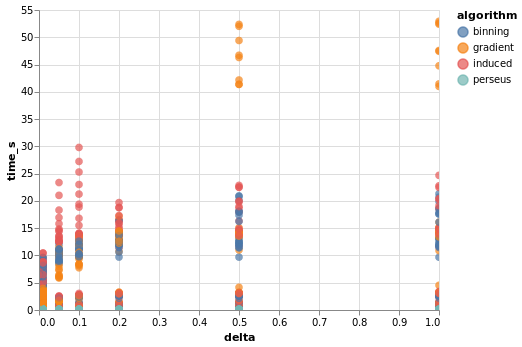

In [6]:
scatter = alt.Chart(times_df).mark_circle(size=60).encode(
        x="delta",
        y="time_s",
        color="algorithm",
        tooltip=["algorithm", "size", "run", "delta", "time_s"]
    ).interactive()

line = alt.Chart(times_df).mark_line().encode(
        x="delta",
        y="time_s",
        color="algorithm",
    detail="run",
    opacity=alt.value(0.5)
    )

scatter + line

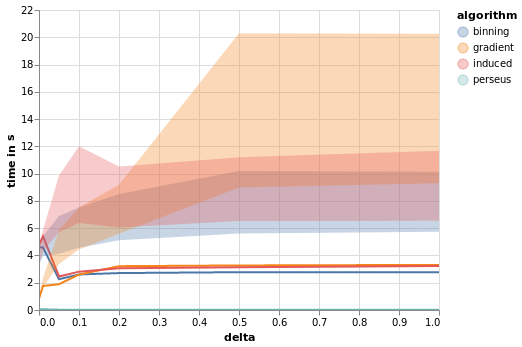

In [7]:
line = alt.Chart(times_df).mark_line().encode(
        x="delta",
        y="median(time_s)",
        color="algorithm"
    ).interactive()

band = alt.Chart(times_df).mark_errorband(extent='ci').encode(
    x='delta',
    y=alt.Y('time_s', title='time in s'),
    color="algorithm"
)

line + band

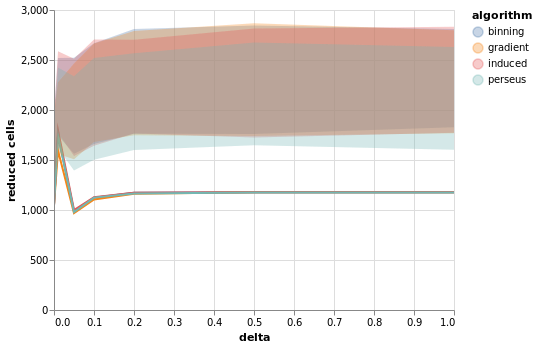

In [8]:
line = alt.Chart(times_df).mark_line().encode(
        x="delta",
        y="median(result)",
        color="algorithm"
    ).interactive()

band = alt.Chart(times_df).mark_errorband(extent='ci').encode(
    x='delta',
    y=alt.Y('result', title='reduced cells'),
    color="algorithm"
)

line + band

In [15]:
times_df[["time_s", "size_reduced", "algorithm", "points"]].groupby(["points", "algorithm"]).describe()

time_s                                                       \
                  count       mean        std       min       25%        50%   
points algorithm                                                               
100    binning     77.0   0.915032   0.184822  0.617704  0.778399   0.916372   
       gradient    77.0   0.903317   0.762509  0.140486  0.290434   0.916157   
       induced     77.0   0.954522   0.217212  0.599100  0.771897   0.975936   
       perseus    105.0   0.014101   0.001195  0.011128  0.013652   0.014324   
200    binning    150.0   6.613686   5.477097  1.278298  2.505740   4.585440   
       gradient   150.0   7.991653  13.982961  0.317144  1.150270   2.736522   
       induced    150.0   8.294940   7.468940  1.264362  2.632333   5.065389   
       perseus    150.0   0.073514   0.049931  0.017649  0.023992   0.086795   
500    binning     84.0   9.079542   3.204456  3.701035  5.552393  10.271938   
       gradient    84.0   8.503238   5.484530  0.819089  2.212799  10.601012   
       induced     84.0  10.589945   4.127960  3.882219  5.440387  12.576325   
       perseus     84.0   0.059300   0.015092  0.038462  0.052461   0.057718   

                                       size_reduced                           \
                        75%        max        count         mean         std   
points algorithm                                                               
100    binning     1.046623   1.462468         77.0   370.454545   13.049043   
       gradient    1.157363   4.528573         77.0   370.454545   13.049043   
       induced     1.085735   1.548991         77.0   370.454545   13.049043   
       perseus     0.014857   0.017775        105.0   370.333333   12.954556   
200    binning     9.542691  21.320518        150.0  1267.360000  471.716618   
       gradient    6.068541  52.928180        150.0  1267.360000  471.716618   
       induced    14.790250  29.801541        150.0  1267.360000  471.716618   
       perseus     0.116080   0.185913        150.0  1267.360000  471.716618   
500    binning    11.947643  13.167080         84.0  1926.666667   30.245316   
       gradient   13.596864  16.099778         84.0  1926.666667   30.245316   
       induced    14.097805  16.555306         84.0  1926.666667   30.245316   
       perseus     0.061546   0.124594         84.0  1926.666667   30.245316   

                                                          
                     min     25%     50%     75%     max  
points algorithm                                          
100    binning     353.0   357.0   373.0   385.0   387.0  
       gradient    353.0   357.0   373.0   385.0   387.0  
       induced     353.0   357.0   373.0   385.0   387.0  
       perseus     353.0   357.0   373.0   385.0   387.0  
200    binning     717.0   765.0  1605.0  1705.0  1831.0  
       gradient    717.0   765.0  1605.0  1705.0  1831.0  
       induced     717.0   765.0  1605.0  1705.0  1831.0  
       perseus     717.0   765.0  1605.0  1705.0  1831.0  
500    binning    1859.0  1908.0  1931.0  1944.5  1967.0  
       gradient   1859.0  1908.0  1931.0  1944.5  1967.0  
       induced    1859.0  1908.0  1931.0  1944.5  1967.0  
       perseus    1859.0  1908.0  1931.0  1944.5  1967.0

In [17]:
pd.value_counts(times_df[times_df["points"] == 100]["filename"])

normal_dist_2D_100pts_0.csv    63
normal_dist_2D_100pts_3.csv    35
normal_dist_2D_100pts_2.csv    35
normal_dist_2D_100pts_1.csv    35
normal_dist_2D_100pts_7.csv    28
normal_dist_2D_100pts_4.csv    28
normal_dist_2D_100pts_5.csv    28
normal_dist_2D_100pts_8.csv    28
normal_dist_2D_100pts_6.csv    28
normal_dist_2D_100pts_9.csv    28
Name: filename, dtype: int64